# Проект: Выбор локации для скважины

## Описание проекта
Этот проект направлен на решение задачи выбора оптимальных локаций для бурения нефтяных или газовых скважин. На основе исторических данных о скважинах и окружающих их факторах (таких как географические, геологические и другие переменные) был проведён анализ, целью которого было выявление наиболее перспективных мест для размещения новых скважин.

Для решения этой задачи использовались методы анализа данных, включая построение модели машинного обучения для прогнозирования потенциальной продуктивности скважины в зависимости от множества факторов.

Проект включает следующие этапы:

1) Сбор и подготовка данных: Загрузка и очистка данных, устранение пропусков и обработка аномальных значений.

2) Анализ данных: Оценка зависимости между различными параметрами, создание визуализаций для выявления закономерностей.

3) Моделирование: Применение методов машинного обучения (например, регрессии или кластеризации) для прогнозирования производительности скважин и выбора лучших локаций.

4) Оценка качества модели: Оценка точности модели с использованием метрик качества и тестовых данных.

## Цель проекта
Целью данного проекта является создание модели, которая поможет оптимизировать процессы бурения скважин, обеспечив максимальную производительность при минимальных затратах. Результаты могут быть использованы в качестве рекомендации для выбора локаций для новых скважин на основе анализа исторических данных.

## Практическая направленность
Проект помогает в принятии более обоснованных решений при выборе локации для бурения, что может значительно снизить риски и затраты, а также повысить общую эффективность работы нефтегазовых компаний. Использование аналитических и машинных методов для выбора оптимальных мест для бурения является важным этапом в развитии нефтегазовой отрасли, позволяя минимизировать расходы и повысить доходность.

## Загрузка и подготовка данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from numpy.random import RandomState

from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_1.duplicated().sum()

0

In [7]:
data_1['id'].duplicated().sum()

10

In [8]:
data_1 = data_1.drop_duplicates(subset=['id'])

In [9]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
data_2.duplicated().sum()

0

In [12]:
data_1 = data_1.drop_duplicates(subset=['id'])

In [13]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
data_1 = data_1.drop_duplicates(subset=['id'])

In [16]:
data_3.duplicated().sum()

0

In [17]:
data_1 = data_1.drop('id', axis = 1)
data_2 = data_2.drop('id', axis = 1)
data_3 = data_3.drop('id', axis = 1)

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


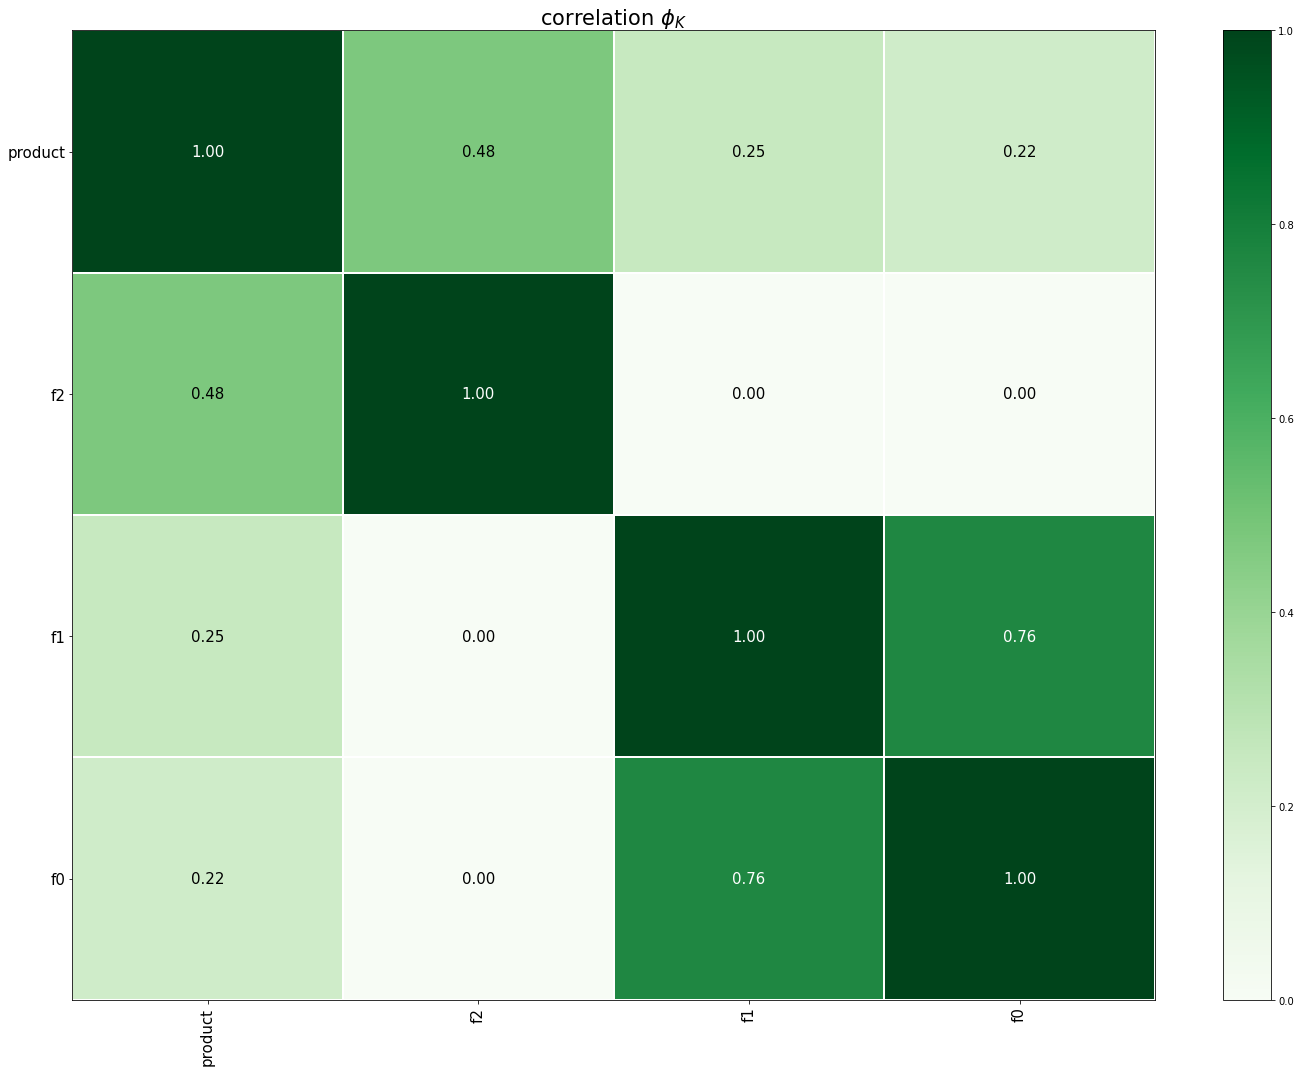

In [18]:
phik_overview = data_1.phik_matrix()

plot_correlation_matrix(
  phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)  

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


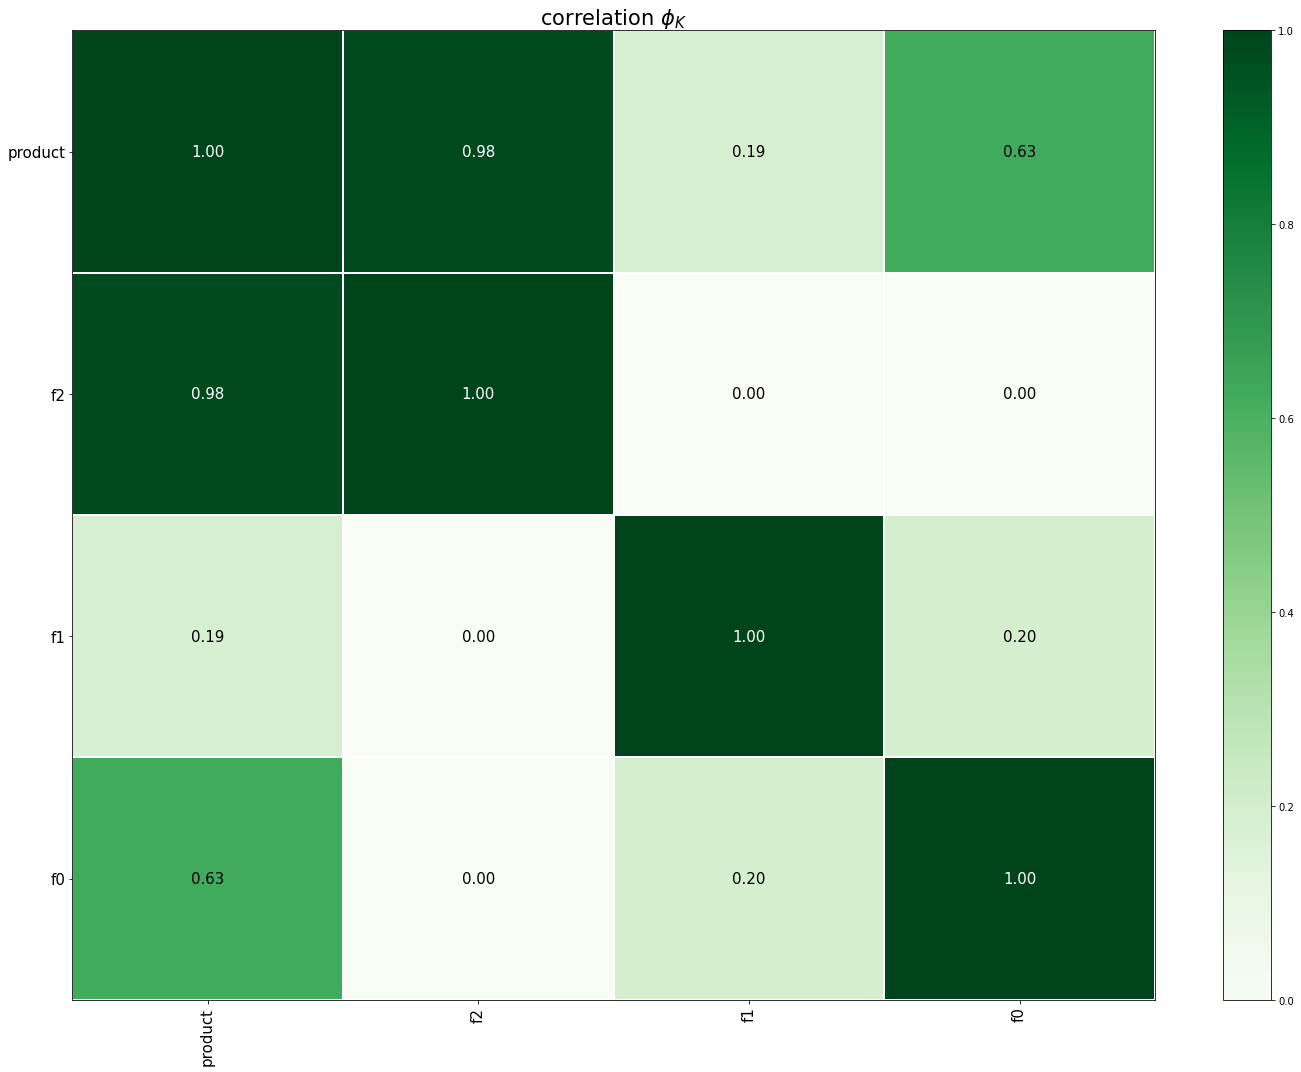

In [19]:
phik_overview = data_2.phik_matrix()

plot_correlation_matrix(
  phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)  

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


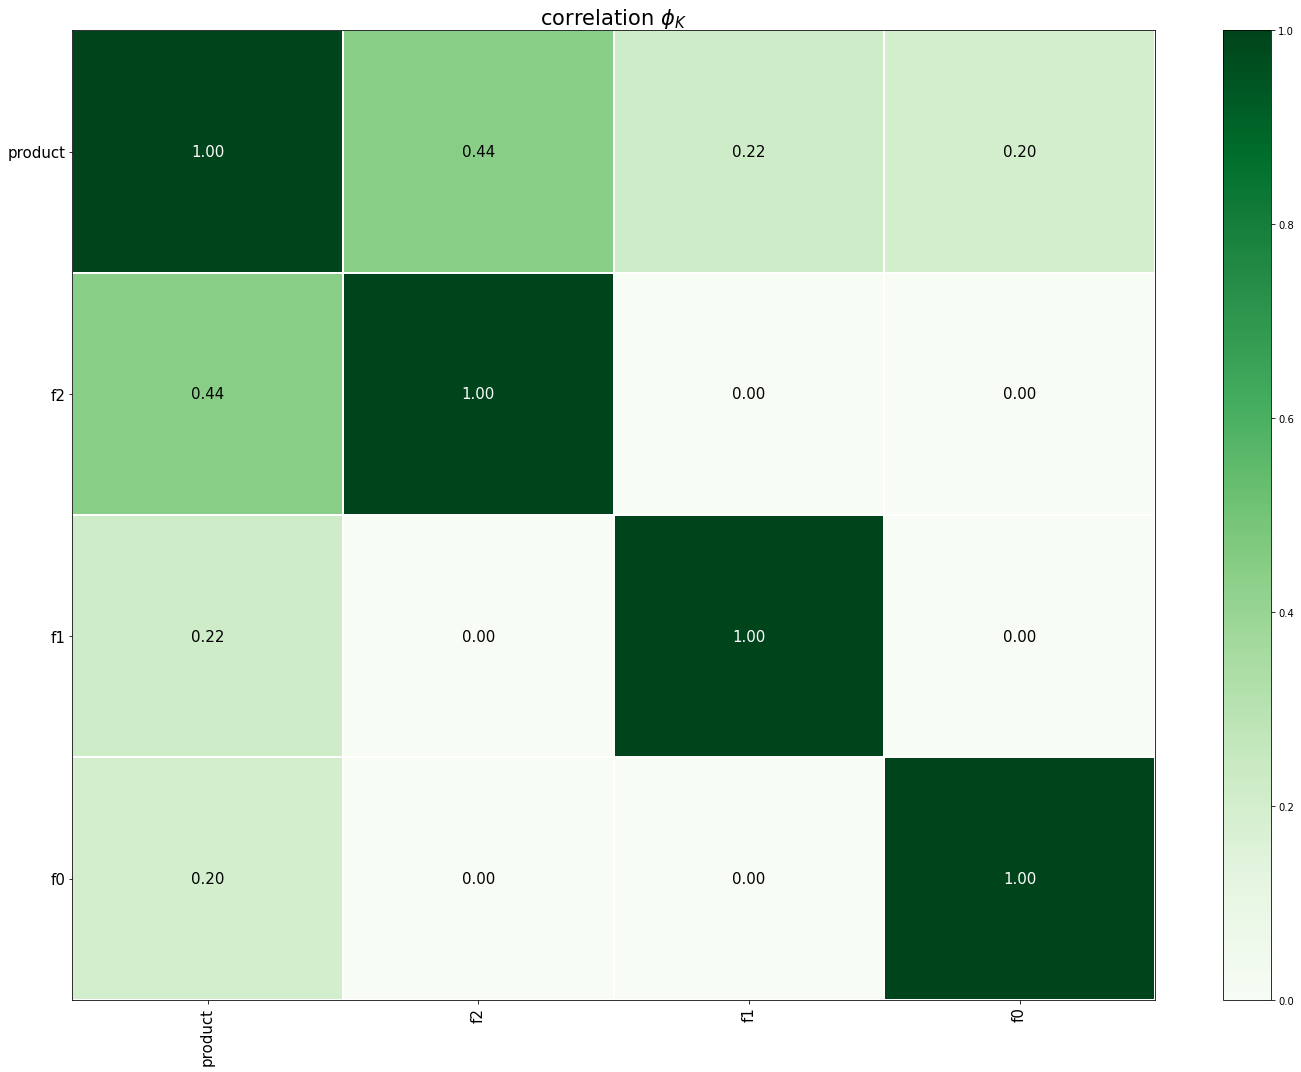

In [20]:
phik_overview = data_3.phik_matrix()

plot_correlation_matrix(
  phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)  

## Обучение и проверка модели

In [21]:
data_1

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


In [22]:
dct = {'val': {}, 'predicts': {}, 'score': {}}
RANDOM_STATE = 42 

dats = [data_1, data_2, data_3]

scaler = StandardScaler()
model = LinearRegression()

for j, i in enumerate(dats):
    X_train, X_val, y_train, y_val = train_test_split(i.drop('product', axis = 1), i['product'], \
                                                      test_size = 0.25, random_state = RANDOM_STATE)
    X_train_sc = scaler.fit_transform(X_train)
    X_val_sc = scaler.transform(X_val)
    model.fit(X_train_sc, y_train)
    pred = model.predict(X_val_sc)
    dct['val']['data_'+str(j+1)] = (y_val, model.predict(X_val_sc))
    
    dct['predicts']['data_'+str(j+1)] = pred
    dct['score']['data_'+str(j+1)] = mean_squared_error(y_val, pred) ** 0.5

In [23]:
dct['score']

{'data_1': 37.68508926201444,
 'data_2': 0.8902801001028846,
 'data_3': 40.145872311342174}

In [24]:
print(dct['val']['data_1'][1].mean())
print(dct['val']['data_2'][1].mean())
print(dct['val']['data_3'][1].mean())

92.60984027552017
68.7128780391376
94.77102387765939


1) самая маленькая ошибка в первом регионе и самое большое количество запасов

2) во втором регионе самое маленькое количество запасов и самая большая ошибка

3) в третьем регионе среднее количество запасов и средняя ошибка


## Подготовка к расчёту прибыли

In [25]:
points = 500
final_points = 200
money = 10 * (10 ** 9)
price_per_bar = 450000
prob_of_loss = 0.025

answer = (money/(price_per_bar))/(final_points)
print(round(answer, 2), 'тыс. баррелей')

111.11 тыс. баррелей


получается что нам нужно чтобы каждая из 200 скважин добывала по 111 объёма сырья, но наши средние результаты по всем регионам оказались хуже

## Расчёт прибыли и рисков 

In [26]:
def income(pred, true):
    pred = pd.Series(pred).sort_values(ascending=False)[:final_points]
    true = true.reset_index(drop = True)[pred.index]
    sum_true = true.sum() 
    return round((sum_true * price_per_bar) - money,2)

In [27]:
print(income(dct['val']['data_1'][1], dct['val']['data_1'][0]))
print(income(dct['val']['data_2'][1], dct['val']['data_2'][0]))
print(income(dct['val']['data_3'][1], dct['val']['data_3'][0]))

3468529787.42
2415086696.68
2598571759.37


In [28]:
RANDOM_STATE = RandomState(RANDOM_STATE) 

In [29]:
def risk(true, pred):
    samples = []
    for i in range(1000):
        sample = pd.Series(pred).sample(n = 500, replace=True, random_state=RANDOM_STATE)
        samples.append(income(sample, true))
    samples = pd.Series(samples)
    print(samples.mean())
    print(samples.apply(lambda x: x < 0).sum() / len(samples) * 100, "%")
    
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    return lower, upper

In [30]:
print(risk(dct['val']['data_1'][0], dct['val']['data_1'][1]), '\n')
print(risk(dct['val']['data_2'][0], dct['val']['data_2'][1]), '\n')
print(risk(dct['val']['data_3'][0], dct['val']['data_3'][1]), '\n')

403572063.95497996
5.8999999999999995 %
(-137690003.15350002, 902848310.7737501) 

452604335.4165
0.7000000000000001 %
(59605450.235750005, 860793726.05) 

378821164.86257
8.5 %
(-136367065.3115, 897945577.7809999) 



Вывод: 

Первый регион имеет: 

    1) средняя прибыль: 403572063.95
    
    2) риск: 5.9 %
    
    3) доверительный интервал: (-137690003.15, 902848310.77) 
    
Второй регион имеет: 

    1) средняя прибыль: 452604335.41
    
    2) риск: 0.7 %
    
    3) доверительный интервал: (59605450.24, 860793726.05) 
   
Третий регион имеет: 

    1) средняя прибыль: 378821164.86
    
    2) риск: 8.5 %
    
    3) доверительный интервал: (-136367065.31, 897945577.78) 
    

по условию риск должен быть < 2.5%, следовательно стоит выбрать второй регион 